In [7]:
import glob
import pandas as pd
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

In [2]:
# Alle CSV-Dateien, die recording_*.csv heißen
files = glob.glob("./recordings/recording_*.csv")

print("Gefundene Dateien:")
for f in files:
    print("  →", f)

# Spalten je Datei erfassen
column_sets = {}

for f in files:
    df = pd.read_csv(f)
    column_sets[f] = set(df.columns)

# Gemeinsame Spalten aller Dateien
common_cols = set.intersection(*column_sets.values())

# Alle vorkommenden Spalten
all_cols = set.union(*column_sets.values())

# Spalten, die nicht überall vorkommen
partial_cols = all_cols - common_cols

print("\nGemeinsame Spalten in ALLEN Dateien:\n", common_cols)
print("\nSpalten, die NICHT in allen vorkommen:\n", partial_cols)


Gefundene Dateien:
  → ./recordings\recording_fabian_1.csv
  → ./recordings\recording_fabian_2.csv
  → ./recordings\recording_florian_1.csv
  → ./recordings\recording_florian_2.csv
  → ./recordings\recording_matthias_1.csv
  → ./recordings\recording_matthias_2.csv


C:\Users\games\AppData\Local\Temp\ipykernel_32448\142664026.py:12: DtypeWarning: Columns (0,1,6,7,8,13,16,20,24,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,64,65,66,67,68,69,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\games\AppData\Local\Temp\ipykernel_32448\142664026.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,21,25,29,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,69,70,71,72,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\games\AppData\Local\Temp\ipykernel_32448\142664026.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,23,27,31,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,71,72,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_


Gemeinsame Spalten in ALLEN Dateien:
 {'lin_acc', 'car0_wheel3_surface_type', 'cruiseControl{1}.mask_objects_adas', 'timestamp', 'car0_caliper2_quat', 'car0_caliper0_quat', 'car0_wheel3_pos', 'car0_wheel3_quat', 'car0_wheel1_surface_type', 'car0_velocity_vehicle', 'car0_wheel2_surface_type', 'car0_wheel0_surface_type', 'car0_wheel1_skid_factor_lat', 'car0_indicator_trigger', 'car0_turbo_spindle_rpm', 'engine_rpm', 'car0_wheel1_skid_factor_lon', 'rrp_pos', 'car0_engine_torque', 'car0_wheel3_skid_factor_lat', 'car0{1}.shift_up', 'car0_velocity', 'car0_vehicle_quat', 'car0{1}.shift_down', 'car0_wheel0_rot_vel', 'car0_wheel0_skid_factor_lon', 'lin_vel', 'brakes_vol', 'car0_engine_rpm', 'car0_wheel1_rot_vel', 'car0_rpm', 'rrp_rot_vel', 'car0_wheel1_quat', 'car0_brake_position', 'car0_wheel2_skid_factor_lat', 'rot_vel', 'car0_engine_max_rpm', 'car0_wheel0_quat', 'car0_wheel2_pos', 'car0_wheel3_surface_volume', 'rot_vel_bc', 'car0_steer_quat', 'car0_turbo_pressure', 'car0_wheel2_surface_volu

C:\Users\games\AppData\Local\Temp\ipykernel_32448\142664026.py:12: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,23,27,31,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,71,72,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [5]:
matrix = pd.DataFrame([
    {f: (c in column_sets[f]) for f in files}
    for c in sorted(all_cols)
], index=sorted(all_cols))

print(matrix)


                            ./recordings\recording_fabian_1.csv  \
brakes                                                     True   
brakes_vol                                                 True   
car0_brake_position                                        True   
car0_caliper0_quat                                         True   
car0_caliper1_quat                                         True   
...                                                         ...   
wheel_adas_velocity_K_v_FF                                False   
wheel_factor_adas                                          True   
wheel_position                                            False   
wheel_raw_position_adas                                   False   
wheel_raw_torque_adas                                     False   

                            ./recordings\recording_fabian_2.csv  \
brakes                                                     True   
brakes_vol                                                 Tr

p:\Apps\Entwicklung\Software\Anaconda\envs\MSuT\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
p:\Apps\Entwicklung\Software\Anaconda\envs\MSuT\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

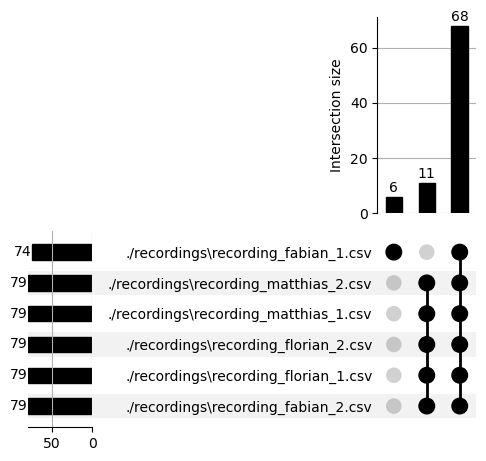

In [8]:
# matrix: Spalte = Dateien, Zeile = Spaltenname, Werte = True/False
matrix_bool = matrix.astype(bool)

# Umwandeln in UpSet-kompatibles Format
upset_data = from_indicators(matrix_bool.columns, matrix_bool)

# UpSet plotten
up = UpSet(upset_data, subset_size='count', show_counts=True)
up.plot()
plt.show()
